In [18]:
# Dataframes.
import pandas as pd

# Numerical arrays.
import numpy as np

# Stationarity
from statsmodels.tsa.stattools import adfuller

# Predictions
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error
from pmdarima.arima.utils import ndiffs
from pmdarima.utils import diff_inv
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

# Plotting.
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

%matplotlib inline

In [19]:
# Change style and size of plots
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["figure.titlesize"] = 15

### Stores
1. Loading the Files

In [20]:
# Load the stores.csv without an index.
stores = pd.read_csv("Walmart Data Set/stores.csv", header=0)

# Display the dafaframe
stores.head()

,Store,Type,Size,Store A,Store B,Store C
0,1,A,151315,219622.0000,140167.0000,42988.00000
1,2,A,202307,39690.0000,34875.0000,39690.00000
2,4,A,205863,177247.7273,101190.7059,40541.66667
3,6,A,202505,NaN,NaN,NaN
4,8,A,155078,NaN,NaN,NaN


In [21]:
# Display the dafaframe
stores.tail()

,Store,Type,Size,Store A,Store B,Store C
40,37,C,39910,NaN,NaN,NaN
41,38,C,39690,NaN,NaN,NaN
42,42,C,39690,NaN,NaN,NaN
43,43,C,41062,NaN,NaN,NaN
44,44,C,39910,NaN,NaN,NaN


In [22]:
stores.describe()

,Store,Size,Store A,Store B,Store C
count,45.000000,45.000000,3.000000,3.000000,3.000000
mean,23.000000,130287.600000,145519.909100,92077.568633,41073.222223
std,13.133926,63825.271991,94068.443124,53234.277201,1712.049789
min,1.000000,34875.000000,39690.000000,34875.000000,39690.000000
25%,12.000000,70713.000000,108468.863650,68032.852950,40115.833335
50%,23.000000,126512.000000,177247.727300,101190.705900,40541.666670
75%,34.000000,202307.000000,198434.863650,120678.852950,41764.833335
max,45.000000,219622.000000,219622.000000,140167.000000,42988.000000


The stores file consist of information about 45 stores, including the type and size of each. We can observe that there are mainly empty values in the columns Store A, Store B and Store C. 



<br>

_2. Data cleaning._

The first step to cleansing the data is by checking it for empty values.

In [23]:
# Check for empty values.
stores.isnull().sum()

Store       0
Type        0
Size        0
Store A    42
Store B    42
Store C    42
dtype: int64

The above confirms that only the last three columns have the empty values. Since they do not provide enough information that could be valuable in the sales forecasting, they will be removed.

In [24]:
# Remove columns with empty values.
cleaned_stores = stores.drop(['Store A','Store B','Store C'], axis=1)

# Check for empty values again.
cleaned_stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [1]:
#pie-chart for the visual representation of store types
#https://pythonspot.com/matplotlib-pie-chart/
# Data to plot
labels = 'store A','store B','store C'
sizes = [(22/(45))*100,(17/(45))*100,(6/(45))*100]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()

NameError: name 'plt' is not defined

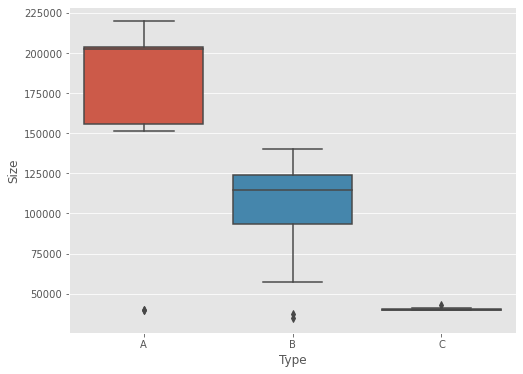

In [26]:
# boxplot for sizes of types of stores
store_type = pd.concat([stores['Type'], stores['Size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=store_type)

Training the Data

In [27]:
# Load the train.csv without an index.
train = pd.read_csv("Walmart Data Set/train.csv", header=0, parse_dates=True, index_col="Date")

# Display the dafaframe.
train.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


In [28]:
# Display the dafaframe.
train.tail()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2012-09-28,45,98,508.37,False
2012-10-05,45,98,628.10,False
2012-10-12,45,98,1061.02,False
2012-10-19,45,98,760.01,False
2012-10-26,45,98,1076.80,False


In [29]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


The above dataframe contains weekly sales for 45 stores per department for the period from 2010-02-05 to 2012-10-26. We can see that altogether there are 99 departments. It also includes the department number and whether the week is a special holiday week.

In [30]:
# Check for empty values.
train.isnull().sum()

Store           0
Dept            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

The dataframe doesn't have any empty values.


In [31]:
epts = train.groupby("Store").Dept.nunique()
print(f"Maximum Departments: {np.max(depts)}\nMinimum Departments: {np.min(depts)}")

NameError: name 'depts' is not defined

<br>

### Mergining data sets.
___

In [ ]:
# Merge the dataframes into one.
df = train.merge(features_train, on=['Store', 'IsHoliday', 'Date'],how='left').dropna()
df = df.merge(cleaned_stores, on=['Store'], how='left')

# Timedelta
#df['Date'] = df['Date'] + pd.to_timedelta(df.groupby('Date').cumcount(), unit='m')
df=df.set_index(['Date'])

# Display the new dataframe with a date index.
df

In [ ]:
df.index.duplicated().sum()

In [ ]:
df.isnull().sum()

In [ ]:
# Create a figure and axis.
fig, ax = plt.subplots(figsize=(13,10))
fig.suptitle("Weekly Sales")

# Date formatter.
date_format(ax,10)
fig.autofmt_xdate()

# Plot the sales
sns.scatterplot(data=df, x=df.index, y="Weekly_Sales", ax=ax)

# Show the plot.
plt.tight_layout()
plt.show()

In [ ]:
# Create a figure and axis.
fig, ax = plt.subplots(figsize=(13,10))
fig.suptitle("Correlation Map")

# Plot the correlation
corr = df.corr()
cmap = sns.diverging_palette(100, 275, as_cmap=True)
sns.heatmap(corr, cmap=cmap, center=0, annot=True,square=True,cbar_kws={"shrink": .7}, ax=ax)

# Set a title and rotate x axis 
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot.
plt.show()

The heatmap shows that weekly sales are dependent on:
* Store Size
* Department
* MarkDown5, MarkDown1, MarkDown3, MarkDown4, MarkDown2
* IsHoliday

<br>
    
### Holidays & Markdowns

In [ ]:
# Create a figure and axis.
fig, ax = plt.subplots(figsize=(20,8))
fig.suptitle("Weekly Sales per Store")

# Plot the data by year
per_store = df.groupby("Store").agg({"Weekly_Sales": "sum"})
per_store.sort_values("Weekly_Sales").plot.bar(ax=ax)

# Set a title and change rotation of xticks back to 0 
plt.title("2011-2012")
plt.xticks(rotation=0)

# Show the plot.
plt.show()

### Preprocessing

In [ ]:
# Change to pivot table per department and tore
sales = pd.pivot_table(df,index=df.index,columns=[df.Store, df.Dept], values='Weekly_Sales',aggfunc=np.sum)

# Stack the pivot table and remove rows with more than 10% (apprx 5) missing values
sales = sales.dropna(thresh=len(sales) - 5, axis=0)

In [ ]:
sales = sales.fillna(method="bfill")
sales = sales.fillna(method="ffill")
sales.isnull().sum().any()

In [ ]:
sales.head()

In [ ]:
res = STL(sales.values.flatten(), period=7).fit()
res.plot()
plt.show()

Testing the Data (We use test.csv)

In [33]:
# Load the train.csv without an index.
test_data = pd.read_csv("Walmart Data Set/test.csv", header=0, parse_dates=True, index_col="Date")

# Display the dafaframe.
test_data.head()

,Store,Dept,IsHoliday
Date,,,
2012-11-02,1,1,False
2012-11-09,1,1,False
2012-11-16,1,1,False
2012-11-23,1,1,True
2012-11-30,1,1,False


In [34]:
test_data.tail()

,Store,Dept,IsHoliday
Date,,,
2013-06-28,45,98,False
2013-07-05,45,98,False
2013-07-12,45,98,False
2013-07-19,45,98,False
2013-07-26,45,98,False


In [35]:
test_df = test_data.merge(features_test, on=['Store', 'IsHoliday', 'Date'],how='left')
test_df.index = test_df.Date
test_df = test_df.drop("Date", axis=1)
test_df.head()

NameError: name 'features_test' is not defined

In [ ]:
test_df.tail()

In [32]:
test_df.isnull().sum()

NameError: name 'test_df' is not defined

### References 

> 1.[How to group pandas DataFrame entries by date in a non-unique column](https://stackoverflow.com/questions/11391969/how-to-group-pandas-dataframe-entries-by-date-in-a-non-unique-column)<br>
2. [Date tick labels](https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/date.html)<br>
3. [Pandas Groupby: Summarising, Aggregating, and Grouping data in Python](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/#multiple-statistics-per-group)<br>
4. [Augmented Dickey-Fuller Test in Python](http://www.hackdeploy.com/augmented-dickey-fuller-test-in-python/)<br>
5. [A comprehensive beginner’s guide to create a Time Series Forecast (with Codes in Python and R)](https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/)<br>
6. [Using Python and Auto ARIMA to Forecast Seasonal Time Series](https://medium.com/@josemarcialportilla/using-python-and-auto-arima-to-forecast-seasonal-time-series-90877adff03c)<br>
7. [python pandas : split a data frame based on a column value](https://stackoverflow.com/questions/36192633/python-pandas-split-a-data-frame-based-on-a-column-value)<br>
8. [How should I Handle duplicate times in time series data with pandas?](https://stackoverflow.com/questions/44128600/how-should-i-handle-duplicate-times-in-time-series-data-with-pandas)
9. [pandas dataframe select columns in multiindex [duplicate]](https://stackoverflow.com/questions/25189575/pandas-dataframe-select-columns-in-multiindex)
10. [StackOverflow](https://stackoverflow.com)
11. [StackOverflow](https://stackoverflow.com)